In [1]:
import sqlite3
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

import Cdf

In [2]:
params = {'axes.labelsize' : 14, 'axes.titlesize' : 14,
          'font.size' : 14, 'legend.fontsize' : 14,
          'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
plt.rcParams.update(params)

In [3]:
conn = sqlite3.connect('../data/netflix-data-aggregated.db')

df = pd.read_sql_query('select * from netflix_meta',
                       con=conn, parse_dates=['dtime'])
conn.close()

In [4]:
df

,unit_id,dtime,src_asn_v4,src_holder_v4,address_v4,dst_asn_v4,dst_holder_v4,connect_time_v4,bytes_sec_v4,src_asn_v6,src_holder_v6,address_v6,dst_asn_v6,dst_holder_v6,connect_time_v6,bytes_sec_v6,delta_connect_time,delta_bytes_sec
0,123256,2016-07-22 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,20515,10371717,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,16803,10674265,3712,-302548
1,123256,2016-07-25 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,16457,10272516,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,17265,10867458,-808,-594942
2,123256,2016-12-15 23:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,18057,9869233,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,17221,10550408,836,-681175
3,148650,2016-10-04 18:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,26762,4514214,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,26208,4415574,554,98640
4,950210,2018-03-08 20:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,26690,1774382,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,26973,1756487,-283,17895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969503,661028,2017-10-09 06:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10425,9708303,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10522,10853290,-97,-1144987
969504,661028,2017-10-09 07:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10384,9921601,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10550,9709498,-166,212103
969505,661028,2017-10-18 06:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10499,10911879,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10550,10648217,-51,263662
969506,661028,2017-10-18 07:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10513,9953607,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10445,9987885,68,-34278


In [5]:
df['v4_cache'] = df['src_asn_v4'] == df['dst_asn_v4']
df['v6_cache'] = df['src_asn_v6'] == df['dst_asn_v6']

In [6]:
df[['src_asn_v4', 'dst_asn_v4', 'src_asn_v6', 'dst_asn_v6', 'v4_cache', 'v6_cache']]

,src_asn_v4,dst_asn_v4,src_asn_v6,dst_asn_v6,v4_cache,v6_cache
0,8767,2906,8767,2906,False,False
1,8767,2906,8767,2906,False,False
2,8767,2906,8767,2906,False,False
3,3320,2906,3320,2906,False,False
4,3320,2906,3320,2906,False,False
...,...,...,...,...,...,...
969503,14877,14877,14877,14877,True,True
969504,14877,14877,14877,14877,True,True
969505,14877,14877,14877,14877,True,True
969506,14877,14877,14877,14877,True,True


In [7]:
df[~df['v4_cache']]['dst_asn_v4'].unique()

array([ 2906,  2603,  9145, 21949, 11404,  2116,  8767,  6730, 14369,
       39651, 29695, 15290,  2119, 41164,  5432,  5056,  5645,  9790,
       10084,  5050, 29518, 28135, 28329,  8473,  8881])

In [8]:
df['dtime'] = df['dtime'].dt.floor('D')

In [9]:
v4_cache = df[df['v4_cache']]
v4_no_cache = df[~df['v4_cache']]

v6_cache = df[df['v6_cache']]
v6_no_cache = df[~df['v6_cache']]

In [10]:
v4_cache = v4_cache.groupby(['unit_id', 'dtime'], as_index=False
                           ).agg({'connect_time_v4' : 'median',
                                  'bytes_sec_v4' : 'median'}
                                )

v4_no_cache = v4_no_cache.groupby(['unit_id', 'dtime'], as_index=False
                                 ).agg({'connect_time_v4' : 'median',
                                        'bytes_sec_v4' : 'median'}
                                      )

v6_cache = v6_cache.groupby(['unit_id', 'dtime'], as_index=False
                           ).agg({'connect_time_v6' : 'median',
                                  'bytes_sec_v6' : 'median'}
                                )

v6_no_cache = v6_no_cache.groupby(['unit_id', 'dtime'], as_index=False
                                 ).agg({'connect_time_v6' : 'median',
                                        'bytes_sec_v6' : 'median'}
                                      )

In [11]:
# match measurement pairs where on measurement went to a cache and the other one to the CDN
v4 = v4_no_cache.merge(v4_cache, on=['unit_id', 'dtime'], suffixes=('_cdn', '_cache'), how='outer')
v6 = v6_no_cache.merge(v6_cache, on=['unit_id', 'dtime'], suffixes=('_cdn', '_cache'), how='outer')

In [12]:
v4['delta_connect_time'] = v4['connect_time_v4_cdn'] - v4['connect_time_v4_cache']
v6['delta_connect_time'] = v6['connect_time_v6_cdn'] - v6['connect_time_v6_cache']

In [13]:
v4['delta_throughput'] = v4['bytes_sec_v4_cdn'] - v4['bytes_sec_v4_cache']
v6['delta_throughput'] = v6['bytes_sec_v6_cdn'] - v6['bytes_sec_v6_cache']

In [14]:
for delta_df in [v4, v6]:
    delta_df['delta_connect_time'] = delta_df['delta_connect_time']/1000.0
    delta_df['delta_throughput'] = delta_df['delta_throughput']/1024.0/1024.0

In [15]:
v4['year'] = v4['dtime'].dt.year
v6['year'] = v6['dtime'].dt.year

In [16]:
v4

,unit_id,dtime,connect_time_v4_cdn,bytes_sec_v4_cdn,connect_time_v4_cache,bytes_sec_v4_cache,delta_connect_time,delta_throughput,year
0,62712,2017-01-31,4316.5,4102220.0,NaN,NaN,NaN,NaN,2017
1,62712,2017-02-01,8431.5,2721852.5,NaN,NaN,NaN,NaN,2017
2,62712,2017-02-02,4499.0,4089332.0,NaN,NaN,NaN,NaN,2017
3,62712,2017-02-03,4255.0,4083443.0,NaN,NaN,NaN,NaN,2017
4,62712,2017-02-04,4572.0,4082982.0,NaN,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...
48839,950230,2019-04-27,NaN,NaN,4703.5,5717388.5,NaN,NaN,2019
48840,950230,2019-04-28,NaN,NaN,4564.5,5623500.5,NaN,NaN,2019
48841,950230,2019-04-29,NaN,NaN,4582.0,5718878.5,NaN,NaN,2019
48842,950230,2019-04-30,NaN,NaN,4561.5,5721589.5,NaN,NaN,2019


In [17]:
v6

,unit_id,dtime,connect_time_v6_cdn,bytes_sec_v6_cdn,connect_time_v6_cache,bytes_sec_v6_cache,delta_connect_time,delta_throughput,year
0,62712,2017-01-31,18557.5,5298538.0,NaN,NaN,NaN,NaN,2017
1,62712,2017-02-01,19450.5,4475821.5,NaN,NaN,NaN,NaN,2017
2,62712,2017-02-02,18860.0,5223051.0,NaN,NaN,NaN,NaN,2017
3,62712,2017-02-03,18921.0,5296922.0,NaN,NaN,NaN,NaN,2017
4,62712,2017-02-04,18607.0,5329708.0,NaN,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...
48839,950230,2019-04-27,NaN,NaN,4746.5,5603218.0,NaN,NaN,2019
48840,950230,2019-04-28,NaN,NaN,4754.0,5495707.0,NaN,NaN,2019
48841,950230,2019-04-29,NaN,NaN,4678.0,5632485.5,NaN,NaN,2019
48842,950230,2019-04-30,NaN,NaN,4575.5,5639197.0,NaN,NaN,2019


In [18]:
v4 = v4.dropna()
v6 = v6.dropna()

In [19]:
v4_by_years = v4[v4['dtime'] < '2019-01-01'].groupby('year')
v6_by_years = v6[v6['dtime'] < '2019-01-01'].groupby('year')

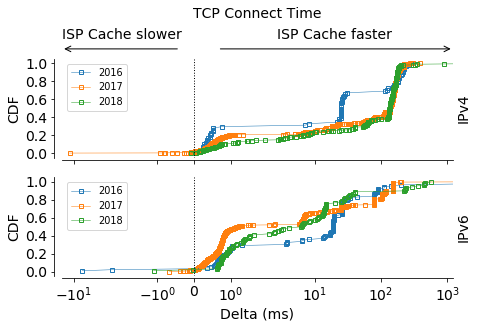

In [20]:
cdf_fig, (cdf_v4_ax, cdf_v6_ax) = plt.subplots(figsize = (7, 4), nrows=2)

cdfs = []

for year, year_df in v4_by_years:
    tcp_conn = Cdf.MakeCdfFromList(year_df['delta_connect_time'])

    cdf_v4_ax.plot(tcp_conn.xs, tcp_conn.ps, label = year, marker = 's',
                   linewidth = 0.5, markersize = 3.5, fillstyle = 'none')

    cdfs.append((year, 'IPv4', 'TCP Connect Time Deltas', tcp_conn))
        
for year, year_df in v6_by_years:
    tcp_conn = Cdf.MakeCdfFromList(year_df['delta_connect_time'])

    cdf_v6_ax.plot(tcp_conn.xs, tcp_conn.ps, label = year, marker = 's',
                   linewidth = 0.5, markersize = 3.5, fillstyle = 'none')

    cdfs.append((year, 'IPv6', 'TCP Connect Time Deltas', tcp_conn))

for cdf_ax, version in [(cdf_v4_ax, 'IPv4'), (cdf_v6_ax, 'IPv6')]:
    cdf_ax.set_ylim([-0.05, 1.05])
    cdf_ax.set_xlabel('Delta (ms)')
    cdf_ax.set_ylabel('CDF')
    cdf_ax.set_xlim([-15, 1200])
    cdf_ax.set_xscale('symlog')

    cdf_ax.legend(loc = 'upper left', fontsize = 'x-small')

    yticks = np.arange(0.0, 1.01, 0.2)
    cdf_ax.set_yticks(yticks)
    cdf_ax.grid(False)
    cdf_ax.spines['right'].set_color('none')
    cdf_ax.spines['top'].set_color('none')
    cdf_ax.yaxis.set_ticks_position('left')
    cdf_ax.xaxis.set_ticks_position('bottom')
    cdf_ax.spines['bottom'].set_position(('axes', -0.02))
    cdf_ax.spines['left'].set_position(('axes', -0.02))
        
    cdf_ax.axvline(x=0.0, linewidth=1.0, color='black', ls = 'dotted')
    
    ax_ = cdf_ax.twinx()
    ax_.spines['right'].set_color('none')
    ax_.spines['top'].set_color('none')
    ax_.spines['left'].set_color('none')
    ax_.spines['bottom'].set_color('none')
    ax_.yaxis.set_ticks_position('none')
    ax_.set_ylabel('%s' % version)
    plt.setp(ax_.get_yticklabels(), visible=False)

cdf_v4_ax.set_xticklabels('')
cdf_v4_ax.set_xlabel('')

cdf_v4_ax.annotate('', xy = (0.30, 1.1), xycoords = 'axes fraction', xytext = (0, 1.1), 
            arrowprops = dict(arrowstyle = "<-"))
cdf_v4_ax.annotate('', xy = (1, 1.1), xycoords = 'axes fraction', xytext = (0.4, 1.1), 
                    arrowprops = dict(arrowstyle="->"))

cdf_v4_ax.text(0, 1.2, "ISP Cache slower", transform=cdf_v4_ax.transAxes)
cdf_v4_ax.text(0.55, 1.2, "ISP Cache faster", transform=cdf_v4_ax.transAxes)

cdf_v4_ax.set_title('TCP Connect Time', y=1.35)

cdf_fig.savefig('../plots/tcp-conn-deltas-cache-vs-cdn-by-years.pdf', bbox_inches = 'tight')
plt.show()

In [21]:
for year, version, metric, cdf in cdfs:
    print(year, '\t', version, '\t', metric)
    print('----------------')
    skip = max(int(len(cdf.xs)/150), 1)
    for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
        print('%.2f\t\t%.5f' % (x, p))
    print('\n===========================\n')

2016 	 IPv4 	 TCP Connect Time Deltas
----------------
0.15		0.01639
0.20		0.03279
0.23		0.04918
0.24		0.06557
0.26		0.08197
0.28		0.09836
0.31		0.11475
0.34		0.13115
0.35		0.14754
0.37		0.16393
0.43		0.18033
0.44		0.19672
0.45		0.21311
0.46		0.22951
0.50		0.24590
0.51		0.26230
0.51		0.27869
0.75		0.29508
7.27		0.31148
8.27		0.32787
21.83		0.34426
23.14		0.36066
23.25		0.37705
24.69		0.39344
24.98		0.40984
25.00		0.42623
25.06		0.44262
25.06		0.45902
25.13		0.47541
25.14		0.49180
25.16		0.50820
25.22		0.52459
25.31		0.54098
25.43		0.55738
25.71		0.57377
26.13		0.59016
26.23		0.60656
26.41		0.62295
27.60		0.63934
28.38		0.65574
30.41		0.67213
113.08		0.68852
121.52		0.70492
127.88		0.72131
154.08		0.73770
158.97		0.75410
161.32		0.77049
178.34		0.78689
178.39		0.80328
180.72		0.81967
183.87		0.83607
187.76		0.85246
199.79		0.86885
206.36		0.88525
212.26		0.90164
213.92		0.91803
222.65		0.93443
225.10		0.95082
237.85		0.96721
268.04		0.98361
282.52		1.00000


2017 	 IPv4 	 TCP Connect Ti

In [22]:
for year, version, metric, cdf in cdfs:
    print(year, '\t', version, '\t', metric)
    print('----------------')
    skip = max(int(len(cdf.xs)/150), 1)
    for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
        print('%.2f\t\t%.5f' % (x, p))
    print('\n===========================\n')

2016 	 IPv4 	 TCP Connect Time Deltas
----------------
0.15		0.01639
0.20		0.03279
0.23		0.04918
0.24		0.06557
0.26		0.08197
0.28		0.09836
0.31		0.11475
0.34		0.13115
0.35		0.14754
0.37		0.16393
0.43		0.18033
0.44		0.19672
0.45		0.21311
0.46		0.22951
0.50		0.24590
0.51		0.26230
0.51		0.27869
0.75		0.29508
7.27		0.31148
8.27		0.32787
21.83		0.34426
23.14		0.36066
23.25		0.37705
24.69		0.39344
24.98		0.40984
25.00		0.42623
25.06		0.44262
25.06		0.45902
25.13		0.47541
25.14		0.49180
25.16		0.50820
25.22		0.52459
25.31		0.54098
25.43		0.55738
25.71		0.57377
26.13		0.59016
26.23		0.60656
26.41		0.62295
27.60		0.63934
28.38		0.65574
30.41		0.67213
113.08		0.68852
121.52		0.70492
127.88		0.72131
154.08		0.73770
158.97		0.75410
161.32		0.77049
178.34		0.78689
178.39		0.80328
180.72		0.81967
183.87		0.83607
187.76		0.85246
199.79		0.86885
206.36		0.88525
212.26		0.90164
213.92		0.91803
222.65		0.93443
225.10		0.95082
237.85		0.96721
268.04		0.98361
282.52		1.00000


2017 	 IPv4 	 TCP Connect Ti

In [23]:
tcp_conn_delta_v4 = Cdf.MakeCdfFromList(v4['delta_connect_time'])
throughput_delta_v4 = Cdf.MakeCdfFromList(v4['delta_throughput'])

tcp_conn_delta_v6 = Cdf.MakeCdfFromList(v6['delta_connect_time'])
throughput_delta_v6 = Cdf.MakeCdfFromList(v6['delta_throughput'])

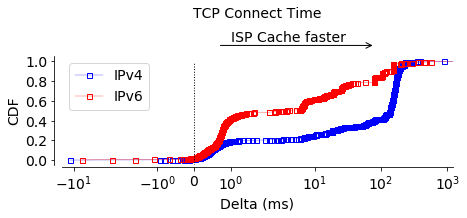

In [24]:
cdf_fig, cdf_ax = plt.subplots(figsize = (7, 2))

cdf_ax.plot(tcp_conn_delta_v4.xs, tcp_conn_delta_v4.ps, marker = 's', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'blue')
cdf_ax.plot(tcp_conn_delta_v6.xs, tcp_conn_delta_v6.ps, marker = 's', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'red')

cdf_ax.grid(False)
yticks = np.arange(0,1.1,0.2)
cdf_ax.set_yticks(yticks)
cdf_ax.set_xlim([-15, 1200])
cdf_ax.set_ylim([-0.05,1.05])
cdf_ax.set_xscale('symlog')
cdf_ax.set_xlabel('Delta (ms)')
cdf_ax.set_ylabel('CDF')

cdf_ax.legend(["IPv4", "IPv6"], loc = 'upper left')

cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.02))
cdf_ax.spines['left'].set_position(('axes', -0.02))

cdf_ax.axvline(x = 0, linewidth = 1.0, ymax = 0.95, ymin = 0, color='black', ls = 'dotted')
cdf_ax.annotate('', xy = (0.8, 1.1), xycoords = 'axes fraction', xytext = (0.4, 1.1), 
            arrowprops = dict(arrowstyle = '->'))
cdf_ax.text(1, 1.2, 'ISP Cache faster')

cdf_ax.set_title('TCP Connect Time', y = 1.30)
cdf_fig.savefig('../plots/tcp-conn-deltas-cache-vs-cdn.pdf', bbox_inches = 'tight')
plt.show()

In [25]:
print('------ TCP CONN V4 ------')
print('m_delta; cdf')
print('-------------------------')
for x, y in list(zip(tcp_conn_delta_v4.xs, tcp_conn_delta_v4.ps))[0::20]:
    print('%.2f; %.5f' % (x, y))


------ TCP CONN V4 ------
m_delta; cdf
-------------------------
-11.54; 0.00059
-0.01; 0.01295
0.14; 0.02472
0.24; 0.03943
0.31; 0.05297
0.37; 0.06592
0.41; 0.07887
0.45; 0.09300
0.49; 0.10653
0.54; 0.12125
0.61; 0.13420
0.66; 0.14832
0.73; 0.16245
0.80; 0.17422
0.94; 0.18717
1.19; 0.19894
3.84; 0.21071
6.35; 0.22307
7.27; 0.23484
8.86; 0.24720
10.47; 0.25898
14.52; 0.27075
18.18; 0.28252
18.42; 0.29429
21.60; 0.30606
24.00; 0.31783
26.41; 0.32961
40.52; 0.34197
55.42; 0.35374
59.34; 0.36551
62.39; 0.37728
71.53; 0.38905
77.20; 0.40082
85.83; 0.41260
111.45; 0.42437
112.28; 0.43614
113.44; 0.44791
117.58; 0.45968
132.36; 0.47145
134.66; 0.48323
135.71; 0.49559
135.89; 0.50853
136.10; 0.52031
136.58; 0.53208
139.52; 0.54385
141.72; 0.55562
144.07; 0.56739
145.76; 0.57916
146.85; 0.59094
147.64; 0.60271
149.70; 0.61448
150.43; 0.62625
151.59; 0.63802
152.97; 0.64979
153.53; 0.66157
154.42; 0.67334
155.49; 0.68511
157.13; 0.69688
158.73; 0.70865
160.35; 0.72042
161.62; 0.73220
162.51; 0.

In [26]:
print('------ TCP CONN V6 ------')
print('m_delta; cdf')
print('-------------------------')
for x, y in list(zip(tcp_conn_delta_v6.xs, tcp_conn_delta_v6.ps))[0::20]:
    print('%.2f; %.5f' % (x, y))

------ TCP CONN V6 ------
m_delta; cdf
-------------------------
-7.47; 0.00149
0.09; 0.03130
0.22; 0.06259
0.34; 0.09240
0.45; 0.12370
0.56; 0.15350
0.64; 0.18927
0.67; 0.22206
0.72; 0.25931
0.75; 0.29508
0.78; 0.33085
0.84; 0.36662
0.92; 0.39940
1.05; 0.43368
1.31; 0.46647
3.17; 0.49627
6.35; 0.52608
6.78; 0.55589
7.10; 0.58569
10.24; 0.61699
14.24; 0.64680
19.09; 0.67660
24.84; 0.70641
25.73; 0.73621
32.20; 0.76602
77.67; 0.79583
78.06; 0.82563
104.66; 0.85544
111.89; 0.88525
149.99; 0.91505
150.22; 0.94486
195.16; 0.97466


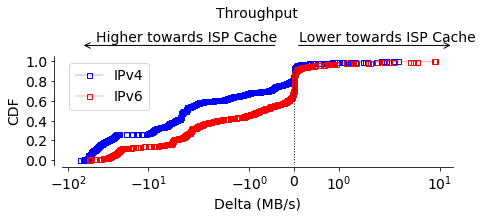

In [27]:
cdf_fig, cdf_ax = plt.subplots(figsize = (7, 2))

cdf_ax.plot(throughput_delta_v4.xs, throughput_delta_v4.ps, label = 'IPv4', marker = 's', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'blue')
cdf_ax.plot(throughput_delta_v6.xs, throughput_delta_v6.ps, label = 'IPv6', marker = 's', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'red')

cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.02))
cdf_ax.spines['left'].set_position(('axes', -0.02))

cdf_ax.legend(loc = 'upper left')

yticks = np.arange(0,1.1,0.2)
cdf_ax.grid(False)
cdf_ax.set_yticks(yticks)
cdf_ax.set_ylim([-0.05,1.05])
cdf_ax.set_xscale('symlog')
cdf_ax.set_xlabel('Delta (MB/s)')
cdf_ax.set_ylabel('CDF')

cdf_ax.axvline(x = 0, linewidth = 1.0, ymax = 0.95, ymin = 0, color = 'black', ls = 'dotted')

cdf_ax.annotate('', xy = (0.55, 1.1), xycoords = 'axes fraction', xytext = (0.05, 1.1), 
            arrowprops = dict(arrowstyle = '<-'))

cdf_ax.annotate('', xy = (1, 1.1), xycoords = 'axes fraction', xytext = (0.6, 1.1), 
            arrowprops = dict(arrowstyle = '->'))

cdf_ax.text(-45, 1.2, 'Higher towards ISP Cache')
cdf_ax.text(0.1, 1.2, 'Lower towards ISP Cache')

cdf_ax.set_title('Throughput', y = 1.3)
cdf_fig.savefig('../plots/throughput-deltas-cache-vs-cdn.pdf', bbox_inches = 'tight')
plt.show()

In [28]:
print('------ THROUGHPUT V4 ------')
print('m_delta; cdf')
print('---------------------------')
for x, y in list(zip(throughput_delta_v4.xs, throughput_delta_v4.ps))[0::5]:
    print('%.2f; %.5f' % (x, y))

------ THROUGHPUT V4 ------
m_delta; cdf
---------------------------
-71.08; 0.00059
-63.93; 0.00353
-63.17; 0.00647
-62.18; 0.00942
-61.83; 0.01236
-59.93; 0.01530
-58.40; 0.01825
-57.12; 0.02119
-56.95; 0.02413
-56.79; 0.02707
-56.72; 0.03002
-56.55; 0.03296
-56.29; 0.03590
-56.26; 0.03885
-56.19; 0.04179
-55.94; 0.04473
-55.78; 0.04768
-55.38; 0.05062
-55.15; 0.05356
-53.70; 0.05650
-53.20; 0.05945
-52.59; 0.06239
-52.05; 0.06533
-51.77; 0.06828
-51.68; 0.07122
-51.53; 0.07416
-51.11; 0.07710
-50.73; 0.08005
-50.53; 0.08299
-50.08; 0.08593
-49.82; 0.08888
-49.39; 0.09182
-49.04; 0.09476
-48.07; 0.09770
-47.11; 0.10065
-46.81; 0.10359
-45.75; 0.10653
-45.59; 0.10948
-45.32; 0.11242
-45.12; 0.11536
-44.89; 0.11830
-44.51; 0.12125
-43.87; 0.12419
-43.52; 0.12713
-43.06; 0.13008
-42.83; 0.13302
-42.55; 0.13596
-42.24; 0.13891
-42.00; 0.14185
-41.83; 0.14479
-41.11; 0.14773
-40.71; 0.15068
-40.02; 0.15362
-39.56; 0.15656
-38.90; 0.15951
-38.47; 0.16245
-38.12; 0.16539
-37.56; 0.16833
-37

In [29]:
print('------ THROUGHPUT V6 ------')
print('m_delta; cdf')
print('---------------------------')
for x, y in list(zip(throughput_delta_v6.xs, throughput_delta_v6.ps))[0::5]:
    print('%.2f; %.5f' % (x, y))

------ THROUGHPUT V6 ------
m_delta; cdf
---------------------------
-55.51; 0.00149
-41.43; 0.00894
-36.63; 0.01639
-32.37; 0.02385
-30.56; 0.03130
-29.80; 0.03875
-29.30; 0.04620
-27.24; 0.05365
-25.92; 0.06110
-25.27; 0.06855
-24.91; 0.07601
-24.50; 0.08346
-24.01; 0.09091
-23.34; 0.09836
-22.66; 0.10581
-22.08; 0.11326
-20.68; 0.12072
-16.00; 0.12817
-13.30; 0.13562
-9.64; 0.14307
-7.07; 0.15052
-5.97; 0.15797
-5.27; 0.16542
-5.16; 0.17288
-5.10; 0.18033
-5.06; 0.18778
-5.01; 0.19523
-4.96; 0.20268
-4.87; 0.21013
-4.31; 0.21759
-3.94; 0.22504
-3.71; 0.23249
-3.61; 0.23994
-3.51; 0.24739
-3.46; 0.25484
-3.34; 0.26230
-3.22; 0.26975
-3.07; 0.27720
-3.04; 0.28465
-3.01; 0.29210
-2.99; 0.29955
-2.95; 0.30700
-2.90; 0.31446
-2.87; 0.32191
-2.59; 0.32936
-2.49; 0.33681
-2.43; 0.34426
-2.30; 0.35171
-2.18; 0.35917
-2.08; 0.36662
-1.96; 0.37407
-1.91; 0.38152
-1.85; 0.38897
-1.76; 0.39642
-1.68; 0.40387
-1.61; 0.41133
-1.48; 0.41878
-1.40; 0.42623
-1.27; 0.43368
-1.13; 0.44113
-1.08; 0.448

In [30]:
v4_cache['bytes_sec_v4'].describe()/1024/1024

count      0.014804
mean      17.735259
std       19.860584
min        0.017669
25%        3.830388
50%        7.459992
75%       34.017534
max      107.873515
Name: bytes_sec_v4, dtype: float64

In [31]:
v4_no_cache['bytes_sec_v4'].describe()/1024/1024

count      0.033398
mean       9.467476
std        9.878978
min        0.001788
25%        3.376743
50%        7.545372
75%       11.069229
max      109.567778
Name: bytes_sec_v4, dtype: float64

In [32]:
v6_cache['bytes_sec_v6'].describe()/1024/1024

count      0.013844
mean      17.268579
std       17.375950
min        0.012198
25%        4.366521
50%        8.658371
75%       32.294401
max      103.384365
Name: bytes_sec_v6, dtype: float64

In [33]:
v6_no_cache['bytes_sec_v6'].describe()/1024/1024

count      0.033378
mean       8.019015
std        7.898915
min        0.000272
25%        2.948944
50%        6.870332
75%       10.468393
max      107.509261
Name: bytes_sec_v6, dtype: float64